In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [27]:
def pricing_up_out_barrier_option(S_init, K, barrier_level, rf, sigma, T, t, n, num_of_ite, option_type):
    dt = T / n # number of time steps
    option_prices = np.zeros(num_of_ite)
    S_t = np.full((num_of_ite, n), S_init)   
    df = np.exp(-rf * dt) 
    
    # underlying stock price evolution
    for i in range(num_of_ite):
        for l in range(1, S_t.shape[1]):
            epsilon = np.random.standard_normal()
            S_t[ i, l] = S_t[i, l-1] * np.exp((rf - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * epsilon)
    
    # payoff matrix
    payoff = np.zeros((num_of_ite, 2))
    if option_type == "C":
        payoff[:, 1] = S_t[:,-1] - K
    else:
        payoff[:, 1] = K - S_t[:,-1]
    
    i=0
    for row in S_t:
        max_underlying_value = np.max(row)
        if max_underlying_value >= barrier_level:
            payoff[i,1] = 0 # if barrier is crossed, make the payoff zero otherwise payoff is normal
        i+=1
    
    average_payoff = np.sum(np.amax(payoff, axis=1)) / float(num_of_ite)
    
    option_price = np.exp(-rf * (T - t)) * average_payoff

    return S_t, option_price, S_t[:,-1]

In [28]:
S_init = 120
K = 120 # given in the question that it is currently ATM
rf = 0.06
sigma = 0.3
T = 0.6666666
barrier_level = 141
num_of_ite = 100000
n = int(T * 252)
t = 0
option_type = "C"

In [29]:
S, barrier_option_price, lt = pricing_up_out_barrier_option(S_init, K, barrier_level, rf, sigma, T, t, n , num_of_ite, "C")

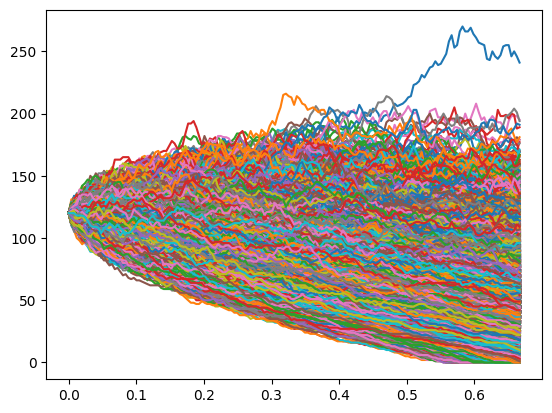

In [25]:
t = np.linspace(0, T, n)
for i in range(num_of_ite):
    plt.plot(t, S[i, :])

In [8]:
rf - 0.5 * sigma**2

0.015

In [30]:
barrier_option_price

0.0035260972557934153

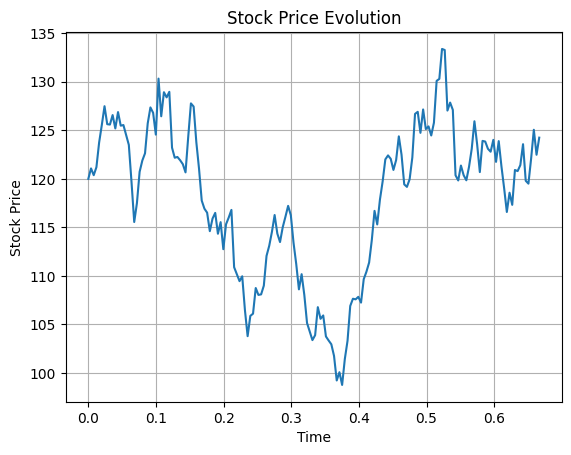

In [21]:
mu = 0.06  # Drift coefficient
sigma = 0.3  # Volatility coefficient
S0 = 120  # Initial stock price
T = 0.66666  # Time period in years
N = int(T*252)  # Number of time steps (assuming daily prices for one year)
dt = T / N  # Time step size

z = np.random.standard_normal(N)  # N random samples from standard normal distribution

S = np.zeros(N+1)  # Array to store stock prices
S[0] = S0  # Set initial stock price

for i in range(1, N+1):
    S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z[i-1])

t = np.linspace(0, T, N+1)  # Time axis
plt.plot(t, S)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Evolution')
plt.grid(True)
plt.show()